A comparison between the initial behaviours of the original and the new implementation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jax
from sympy import Expr

import slimpletic as st

In [2]:
jax.config.read('jax_enable_x64')

True

Here we setup the parameters for the system.

In [3]:
m = 1.0
k = 1.0
ll = 1e-4 * np.sqrt(m * k)  # ll is $\lambda$ in the paper

Then the simulation parameters.

In [4]:
dt = 0.1 * np.sqrt(m / k)
t_sample_count = 100
tmax = t_sample_count * np.sqrt(m / k)
t0 = 0
t = t0 + dt * np.arange(0, t_sample_count + 1)
r=0

Now the system dynamics

In [5]:
def lagrangian_f(q, qdot, t):
    return 0.5 * m * jnp.dot(qdot, qdot) - 0.5 * k * jnp.dot(q, q) ** 2

In [6]:
from sympy import Symbol
from original import slimplectic

dho = slimplectic.GalerkinGaussLobatto('t', ['q'], ['v'])
L = 0.5 * m * np.dot(dho.v, dho.v) - 0.5 * k * np.dot(dho.q, dho.q)
# DHO:
K = -ll * np.dot(dho.vp, dho.qm)
# No damping:
K_nd = Symbol('a')
dho.discretize(L, K_nd, r, method='implicit', verbose=False)

Now with some initial data

In [7]:
q0 = [1.]
pi0 = [0.25 * dt * k]

We get started integrating

In [8]:
o_results = dho.integrate(q0, pi0, t)
o_nr = np.vstack(
    [
        np.array(o_results[0]),
        np.array(o_results[1])
    ],
).T
o_nr

array([[ 1.        ,  0.025     ],
       [ 0.9975    , -0.074875  ],
       [ 0.985025  , -0.17400125],
       [ 0.96269975, -0.27138749],
       [ 0.9307475 , -0.36605985],
       [ 0.88948778, -0.45707161],
       [ 0.83933318, -0.54351266],
       [ 0.78078525, -0.62451858],
       [ 0.71442946, -0.69927932],
       [ 0.64092938, -0.76704726],
       [ 0.56102001, -0.82714473],
       [ 0.47550044, -0.87897075],
       [ 0.38522586, -0.92200707],
       [ 0.29109902, -0.95582331],
       [ 0.1940612 , -0.98008132],
       [ 0.09508276, -0.99453852],
       [-0.00484651, -0.99905033],
       [-0.10472731, -0.99357164],
       [-0.20356084, -0.97815724],
       [-0.30035876, -0.95296126],
       [-0.39415309, -0.91823566],
       [-0.48400589, -0.87432772],
       [-0.56901863, -0.82167649],
       [-0.64834119, -0.7608085 ],
       [-0.72118033, -0.69233242],
       [-0.78680767, -0.61693302],
       [-0.84456693, -0.53536429],
       [-0.89388053, -0.44844192],
       [-0.93425532,

In [9]:
st_results = st.iterate(
    lagrangian=lagrangian_f,
    q0=jnp.array(q0),
    pi0=jnp.array(pi0),
    dt=dt,
    t0=0,
    t_sample_count=t_sample_count,
    r=r
)

st_nr = np.vstack(
    [
        np.array(st_results[0]),
        np.array(st_results[1])
    ],
).T
st_nr

qi_values [[1.00374847]
 [0.9961356 ]]
pi_current [0.025] pi_next [-0.17497392]
qi_values [[1.00982311]
 [0.98202812]]
pi_current [0.025] pi_next [-0.37265464]
qi_values [[1.00539412]
 [0.95796596]]
pi_current [0.025] pi_next [-0.56219404]
qi_values [[0.99047395]
 [0.92453762]]
pi_current [0.025] pi_next [-0.73839005]
qi_values [[0.96541815]
 [0.88258114]]
pi_current [0.025] pi_next [-0.89711874]
qi_values [[0.93089242]
 [0.83311379]]
pi_current [0.025] pi_next [-1.03561086]
qi_values [[0.88781161]
 [0.77725271]]
pi_current [0.025] pi_next [-1.15254454]
qi_values [[0.83726067]
 [0.71613698]]
pi_current [0.025] pi_next [-1.24796421]
qi_values [[0.78040946]
 [0.65086004]]
pi_current [0.025] pi_next [-1.32306584]
qi_values [[0.71843244]
 [0.5824177 ]]
pi_current [0.025] pi_next [-1.37990359]
qi_values [[0.65244152]
 [0.51167385]]
pi_current [0.025] pi_next [-1.42107286]
qi_values [[0.5834364]
 [0.4393431]]
pi_current [0.025] pi_next [-1.44941322]
qi_values [[0.5122735 ]
 [0.36598785]]
pi_

array([[ 1.        ,  0.025     ],
       [ 0.9961356 , -0.17497392],
       [ 0.98202812, -0.37265464],
       [ 0.95796596, -0.56219404],
       [ 0.92453762, -0.73839005],
       [ 0.88258114, -0.89711874],
       [ 0.83311379, -1.03561086],
       [ 0.77725271, -1.15254454],
       [ 0.71613698, -1.24796421],
       [ 0.65086004, -1.32306584],
       [ 0.5824177 , -1.37990359],
       [ 0.51167385, -1.42107286],
       [ 0.4393431 , -1.44941322],
       [ 0.36598785, -1.46775882],
       [ 0.29202637, -1.47874741],
       [ 0.21774859, -1.48468723],
       [ 0.14333674, -1.48747283],
       [ 0.06888854, -1.48853782],
       [-0.00555838, -1.48883223],
       [-0.08000166, -1.48881371],
       [-0.15444949, -1.48844526],
       [-0.22889583, -1.48719469],
       [-0.30329556, -1.48403512],
       [-0.37753953, -1.47744888],
       [-0.45142955, -1.46544077],
       [-0.524654  , -1.44557   ],
       [-0.59676506, -1.415013  ],
       [-0.66715947, -1.37067106],
       [-0.73506559,

In [10]:
st_nr - o_nr

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.36440420e-03, -1.00098915e-01],
       [-2.99687972e-03, -1.98653393e-01],
       [-4.73379246e-03, -2.90806555e-01],
       [-6.20988546e-03, -3.72330199e-01],
       [-6.90664440e-03, -4.40047125e-01],
       [-6.21938567e-03, -4.92098200e-01],
       [-3.53253905e-03, -5.28025957e-01],
       [ 1.70751314e-03, -5.48684890e-01],
       [ 9.93065495e-03, -5.56018575e-01],
       [ 2.13976922e-02, -5.52758862e-01],
       [ 3.61734152e-02, -5.42102107e-01],
       [ 5.41172437e-02, -5.27406156e-01],
       [ 7.48888271e-02, -5.11935507e-01],
       [ 9.79651698e-02, -4.98666087e-01],
       [ 1.22665834e-01, -4.90148708e-01],
       [ 1.48183249e-01, -4.88422492e-01],
       [ 1.73615844e-01, -4.94966181e-01],
       [ 1.98002459e-01, -5.10674990e-01],
       [ 2.20357098e-01, -5.35852453e-01],
       [ 2.39703597e-01, -5.70209594e-01],
       [ 2.55110060e-01, -6.12866973e-01],
       [ 2.65723070e-01, -6.62358632e-01],
       [ 2.

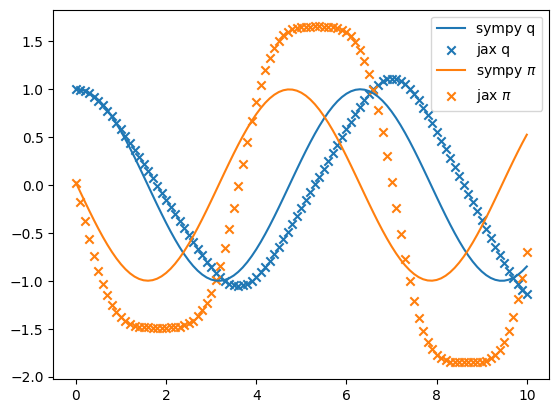

In [11]:
plt.plot(t, o_nr[:, 0], label='sympy q', color='C0')
plt.scatter(t, st_nr[:, 0], label='jax q', color='C0', marker='x')
plt.plot(t, o_nr[:, 1], label='sympy $\pi$', color='C1', )
plt.scatter(t, st_nr[:, 1], label='jax $\pi$', color='C1', marker='x')
plt.legend()